# Task: Covid-19 Data Analysis
### This notebook is used to understand the comprehension of Data Analysis techniques using Pandas library.

### Data Source: 
https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports

### File naming convention

MM-DD-YYYY.csv in UTC.

### Field description

- Province_State: China - province name; US/Canada/Australia/ - city name, state/province name; Others - name of the event (e.g., "Diamond Princess" cruise ship); other countries - blank.

- Country_Region: country/region name conforming to WHO (will be updated).

- Last_Update: MM/DD/YYYY HH:mm (24 hour format, in UTC).

- Confirmed: the number of confirmed cases. For Hubei Province: from Feb 13 (GMT +8), we report both clinically diagnosed and lab-confirmed cases. For lab-confirmed cases only (Before Feb 17), please refer to who_covid_19_situation_reports. For Italy, diagnosis standard might be changed since Feb 27 to "slow the growth of new case numbers." (Source)

- Deaths: the number of deaths.

- Recovered: the number of recovered cases.

### Question 1

#### Read the dataset

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-01-2021.csv"

covid_data = pd.read_csv(url)

covid_data


,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-01-02 05:22:33,33.93911,67.709953,52513,2201,41727,8585,Afghanistan,134.896578,4.191343
1,NaN,NaN,NaN,Albania,2021-01-02 05:22:33,41.15330,20.168300,58316,1181,33634,23501,Albania,2026.409062,2.025173
2,NaN,NaN,NaN,Algeria,2021-01-02 05:22:33,28.03390,1.659600,99897,2762,67395,29740,Algeria,227.809861,2.764848
3,NaN,NaN,NaN,Andorra,2021-01-02 05:22:33,42.50630,1.521800,8117,84,7463,570,Andorra,10505.403482,1.034865
4,NaN,NaN,NaN,Angola,2021-01-02 05:22:33,-11.20270,17.873900,17568,405,11146,6017,Angola,53.452981,2.305328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4006,NaN,NaN,Unknown,Ukraine,2021-01-02 05:22:33,NaN,NaN,0,0,0,0,"Unknown, Ukraine",0.000000,0.000000
4007,NaN,NaN,NaN,Nauru,2021-01-02 05:22:33,-0.52280,166.931500,0,0,0,0,Nauru,0.000000,0.000000
4008,NaN,NaN,Niue,New Zealand,2021-01-02 05:22:33,-19.05440,-169.867200,0,0,0,0,"Niue, New Zealand",0.000000,0.000000
4009,NaN,NaN,NaN,Tuvalu,2021-01-02 05:22:33,-7.10950,177.649300,0,0,0,0,Tuvalu,0.000000,0.000000


#### Display the top 5 rows in the data

In [5]:
covid_data.head(5)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-01-02 05:22:33,33.93911,67.709953,52513,2201,41727,8585,Afghanistan,134.896578,4.191343
1,NaN,NaN,NaN,Albania,2021-01-02 05:22:33,41.15330,20.168300,58316,1181,33634,23501,Albania,2026.409062,2.025173
2,NaN,NaN,NaN,Algeria,2021-01-02 05:22:33,28.03390,1.659600,99897,2762,67395,29740,Algeria,227.809861,2.764848
3,NaN,NaN,NaN,Andorra,2021-01-02 05:22:33,42.50630,1.521800,8117,84,7463,570,Andorra,10505.403482,1.034865
4,NaN,NaN,NaN,Angola,2021-01-02 05:22:33,-11.20270,17.873900,17568,405,11146,6017,Angola,53.452981,2.305328


#### Show the information of the dataset

In [9]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4011 entries, 0 to 4010
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3265 non-null   float64
 1   Admin2               3270 non-null   object 
 2   Province_State       3833 non-null   object 
 3   Country_Region       4011 non-null   object 
 4   Last_Update          4011 non-null   object 
 5   Lat                  3922 non-null   float64
 6   Long_                3922 non-null   float64
 7   Confirmed            4011 non-null   int64  
 8   Deaths               4011 non-null   int64  
 9   Recovered            4011 non-null   int64  
 10  Active               4011 non-null   int64  
 11  Combined_Key         4011 non-null   object 
 12  Incident_Rate        3922 non-null   float64
 13  Case_Fatality_Ratio  3963 non-null   float64
dtypes: float64(5), int64(4), object(5)
memory usage: 438.8+ KB


#### Show the sum of missing values of features in the dataset

In [11]:
covid_data.isnull().sum()

FIPS                   746
Admin2                 741
Province_State         178
Country_Region           0
Last_Update              0
Lat                     89
Long_                   89
Confirmed                0
Deaths                   0
Recovered                0
Active                   0
Combined_Key             0
Incident_Rate           89
Case_Fatality_Ratio     48
dtype: int64

### Question 2

#### Show the number of Confirmed cases by Country

In [65]:
covid_data.groupby('Country_Region')[['Confirmed']].sum()

,Confirmed
Country_Region,
Afghanistan,52513
Albania,58316
Algeria,99897
Andorra,8117
Angola,17568
...,...
West Bank and Gaza,139223
Winter Olympics 2022,0
Yemen,2101


#### Show the number of Deaths by Country

In [17]:
covid_data.groupby('Country_Region')['Deaths'].sum()

Country_Region
Afghanistan             2201
Albania                 1181
Algeria                 2762
Andorra                   84
Angola                   405
                        ... 
West Bank and Gaza      1418
Winter Olympics 2022       0
Yemen                    610
Zambia                   390
Zimbabwe                 369
Name: Deaths, Length: 200, dtype: int64

#### Show the number of Recovered cases by Country

In [19]:
covid_data.groupby('Country_Region')['Recovered'].sum()

Country_Region
Afghanistan              41727
Albania                  33634
Algeria                  67395
Andorra                   7463
Angola                   11146
                         ...  
West Bank and Gaza      118926
Winter Olympics 2022         0
Yemen                     1396
Zambia                   18773
Zimbabwe                 11347
Name: Recovered, Length: 200, dtype: int64

#### Show the number of Active Cases by Country

In [37]:
covid_data.groupby('Country_Region')['Active'].sum()

Country_Region
Afghanistan              8585
Albania                 23501
Algeria                 29740
Andorra                   570
Angola                   6017
                        ...  
West Bank and Gaza      18879
Winter Olympics 2022        0
Yemen                      95
Zambia                   1834
Zimbabwe                 2368
Name: Active, Length: 200, dtype: int64

#### Show the latest number of Confirmed, Deaths, Recovered and Active cases Country-wise

In [39]:
covid_data.groupby('Country_Region')[['Confirmed','Deaths','Recovered','Active']].sum()

,Confirmed,Deaths,Recovered,Active
Country_Region,,,,
Afghanistan,52513,2201,41727,8585
Albania,58316,1181,33634,23501
Algeria,99897,2762,67395,29740
Andorra,8117,84,7463,570
Angola,17568,405,11146,6017
...,...,...,...,...
West Bank and Gaza,139223,1418,118926,18879
Winter Olympics 2022,0,0,0,0
Yemen,2101,610,1396,95


### Question 3

### Show the countries with no recovered cases

In [69]:
countries_no_recovered = covid_data.groupby('Country_Region')[['Recovered']].sum()
countries_no_recovered = countries_no_recovered[countries_no_recovered['Recovered'] == 0]
print(countries_no_recovered)

                      Recovered
Country_Region                 
Antarctica                    0
Belgium                       0
Kiribati                      0
Korea, North                  0
Nauru                         0
Palau                         0
Serbia                        0
Summer Olympics 2020          0
Sweden                        0
Tonga                         0
Tuvalu                        0
US                            0
Winter Olympics 2022          0


#### Show the countries with no confirmed cases

In [71]:
countries_no_recovered = covid_data.groupby('Country_Region')[['Confirmed']].sum()
countries_no_recovered = countries_no_recovered[countries_no_recovered['Confirmed'] == 0]
print(countries_no_recovered)

                      Confirmed
Country_Region                 
Antarctica                    0
Kiribati                      0
Korea, North                  0
Nauru                         0
Palau                         0
Summer Olympics 2020          0
Tonga                         0
Tuvalu                        0
Winter Olympics 2022          0


#### Show the countries with no deaths

In [73]:
countries_no_recovered = covid_data.groupby('Country_Region')[['Deaths']].sum()
countries_no_recovered = countries_no_recovered[countries_no_recovered['Deaths'] == 0]
print(countries_no_recovered)

                                  Deaths
Country_Region                          
Antarctica                             0
Bhutan                                 0
Cambodia                               0
Dominica                               0
Grenada                                0
Holy See                               0
Kiribati                               0
Korea, North                           0
Laos                                   0
Marshall Islands                       0
Nauru                                  0
Palau                                  0
Saint Kitts and Nevis                  0
Saint Vincent and the Grenadines       0
Samoa                                  0
Seychelles                             0
Solomon Islands                        0
Summer Olympics 2020                   0
Timor-Leste                            0
Tonga                                  0
Tuvalu                                 0
Vanuatu                                0
Winter Olympics 

In [101]:
countries_no_deaths = covid_data.groupby('Country_Region')[['Confirmed','Deaths','Recovered']].sum()
countries_no_deaths = countries_no_deaths[countries_no_deaths['Deaths'] == 0]
pivot_result = countries_no_deaths.pivot_table(values=['Confirmed', 'Deaths', 'Recovered'],  index='Country_Region' )
print(pivot_result)

                                  Confirmed  Deaths  Recovered
Country_Region                                                
Antarctica                              0.0     0.0        0.0
Bhutan                                689.0     0.0      449.0
Cambodia                              379.0     0.0      362.0
Dominica                               88.0     0.0       83.0
Grenada                               127.0     0.0      107.0
Holy See                               27.0     0.0       15.0
Kiribati                                0.0     0.0        0.0
Korea, North                            0.0     0.0        0.0
Laos                                   41.0     0.0       40.0
Marshall Islands                        4.0     0.0        4.0
Nauru                                   0.0     0.0        0.0
Palau                                   0.0     0.0        0.0
Saint Kitts and Nevis                  32.0     0.0       29.0
Saint Vincent and the Grenadines      121.0     0.0    

### Question 4

#### Show the Top 10 countries with Confirmed cases

In [109]:
country_region_data = covid_data.groupby('Country_Region')[['Confirmed','Deaths','Recovered','Active']].sum()
country_region_data

,Confirmed,Deaths,Recovered,Active
Country_Region,,,,
Afghanistan,52513,2201,41727,8585
Albania,58316,1181,33634,23501
Algeria,99897,2762,67395,29740
Andorra,8117,84,7463,570
Angola,17568,405,11146,6017
...,...,...,...,...
West Bank and Gaza,139223,1418,118926,18879
Winter Olympics 2022,0,0,0,0
Yemen,2101,610,1396,95


In [111]:
sorted_country_region_data = country_region_data.sort_values(by='Confirmed', ascending=False)
sorted_country_region_data.head(10)

,Confirmed,Deaths,Recovered,Active
Country_Region,,,,
US,20397401,352844,0,19978335
India,10305788,149218,9929568,273109
Brazil,7703971,195541,6855372,649795
Russia,3153960,56798,2553467,543695
France,2697014,64891,200822,2431301
United Kingdom,2549671,95917,5682,2469774
Turkey,2220855,21093,2114760,85002
Italy,2129376,74621,1479988,574767
Spain,1928265,50837,150376,1727052


#### Show the Top 10 Countries with Active cases

In [115]:
sorted_country_region_data = country_region_data.sort_values(by='Active', ascending=False)
sorted_country_region_data.head(10)

,Confirmed,Deaths,Recovered,Active
Country_Region,,,,
US,20397401,352844,0,19978335
United Kingdom,2549671,95917,5682,2469774
France,2697014,64891,200822,2431301
Spain,1928265,50837,150376,1727052
Mexico,1437185,126507,1083768,1310678
Peru,1015137,93231,951318,921906
Netherlands,816616,11624,9651,795341
Brazil,7703971,195541,6855372,649795
Belgium,648289,19581,0,637588


### Question 5

#### Plot Country-wise Total deaths, confirmed, recovered and active casaes where total deaths have exceeded 50,000

In [117]:
import matplotlib.pyplot as plt

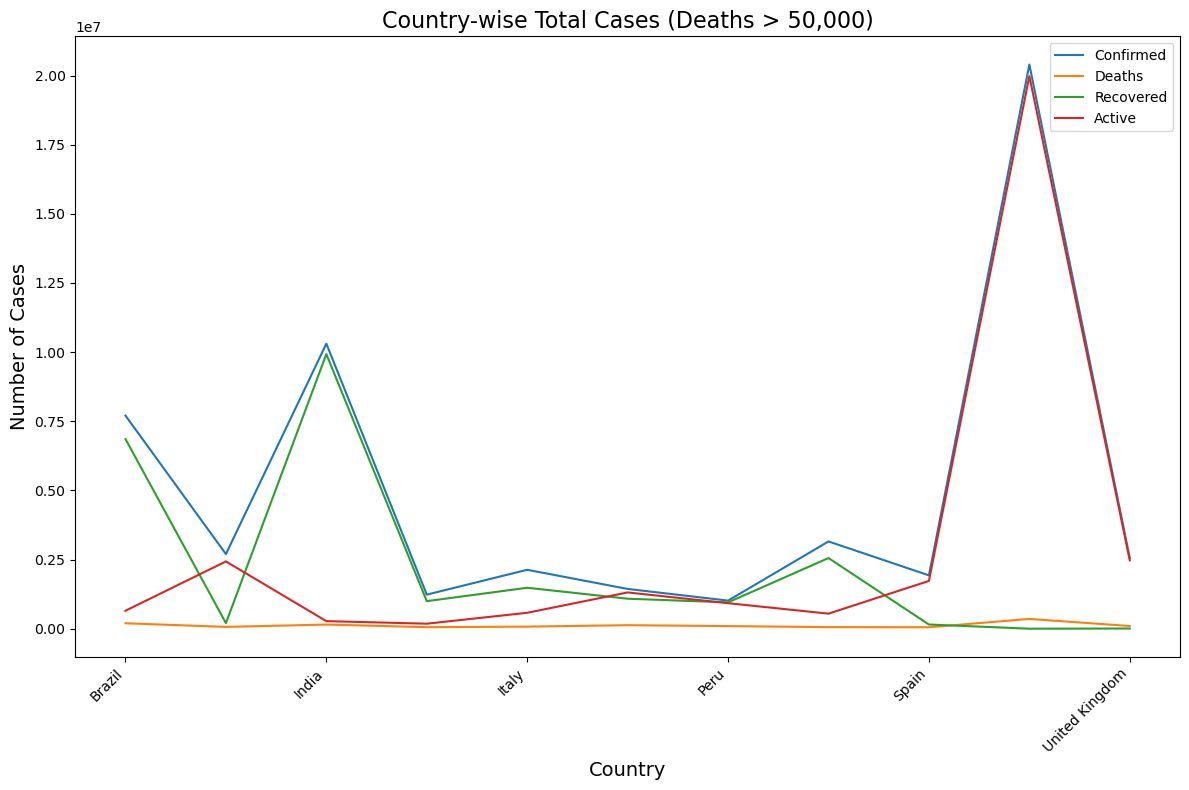

In [121]:
# Group data by 'Country_Region' and calculate the sum for each country
country_summary = covid_data.groupby('Country_Region')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum()

# Filter countries where total deaths exceed 50,000
countries_high_deaths = country_summary[country_summary['Deaths'] > 50000]

# Plot the data
countries_high_deaths.plot(kind='line', figsize=(12, 8))

# Add titles and labels
plt.title('Country-wise Total Cases (Deaths > 50,000)', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Number of Cases', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

### Question 6

### Plot Province/State wise Deaths in USA

In [134]:
import plotly.express as px

In [136]:
covid_data= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-09-2021.csv')

In [138]:
covid_data.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')

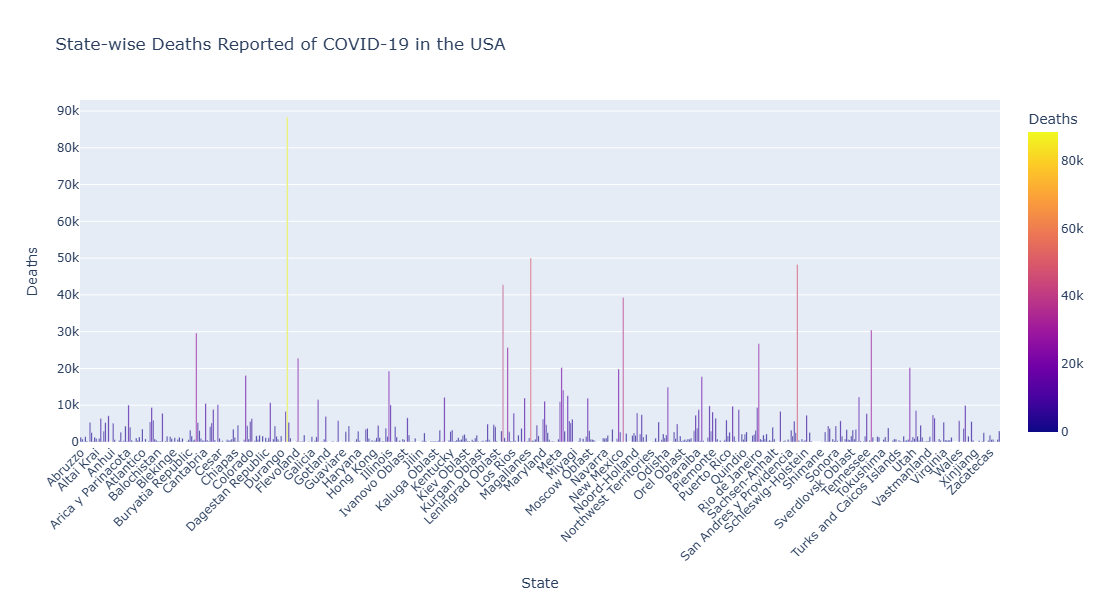

In [152]:
state_deaths = covid_data.groupby('Province_State')['Deaths'].sum().reset_index()
fig = px.bar(
    state_deaths,
    x='Province_State',  
    y='Deaths',          
    title='State-wise Deaths Reported of COVID-19 in the USA',
    labels={'Province_State': 'State', 'Deaths': 'Deaths'},
    color='Deaths',      
    height=600
)

fig.update_layout(
    xaxis_title="State",
    yaxis_title="Deaths",
    xaxis_tickangle=-45,  
)

fig.show()

### Question 7

### Plot Province/State Wise Active Cases in USA

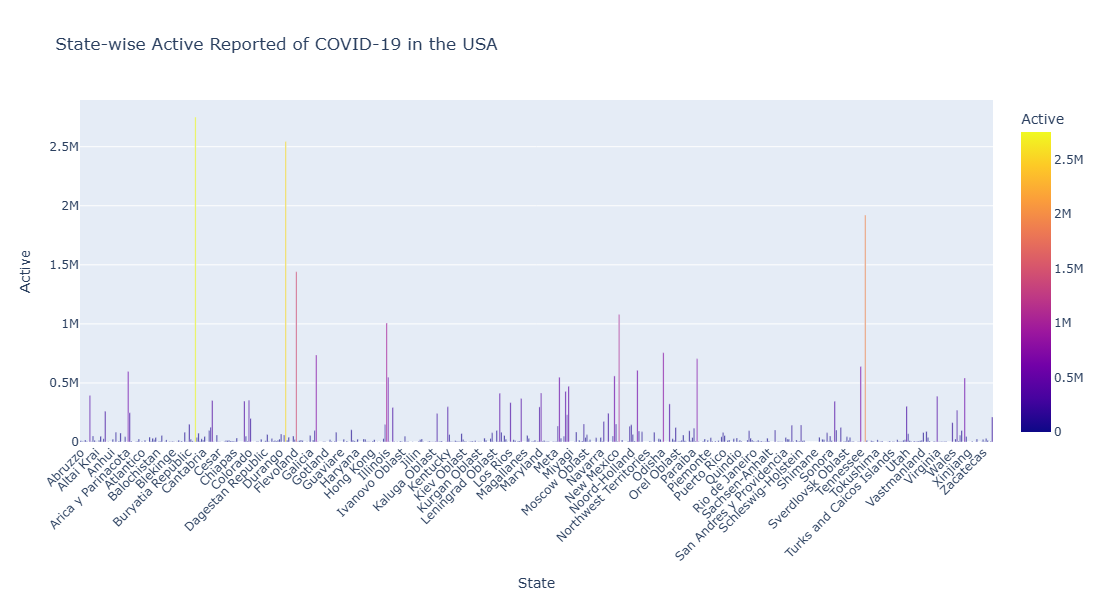

In [158]:
state_deaths = covid_data.groupby('Province_State')['Active'].sum().reset_index()
fig = px.bar(
    state_deaths,
    x='Province_State',  
    y='Active',          
    title='State-wise Active Reported of COVID-19 in the USA',
    labels={'Province_State': 'State', 'Active': 'Active'},
    color='Active',      
    height=600
)

fig.update_layout(
    xaxis_title="State",
    yaxis_title="Active",
    xaxis_tickangle=-45,  
)

fig.show()

### Question 8

### Plot Province/State Wise Confirmed cases in USA

In [170]:
import pandas as pd
import plotly.express as px

covid_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-09-2021.csv')

usa_data = covid_data[covid_data['Country_Region'] == 'US']

state_summary = usa_data.groupby('Province_State')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()
print(state_summary)
state_summary_melted = state_summary.melt(
    id_vars='Province_State', 
    value_vars=['Confirmed', 'Deaths'], 
    var_name='Case', 
    value_name='Count'
)

print(state_summary_melted)


              Province_State  Confirmed  Deaths  Recovered   Active
0                    Alabama     399150    5299          0   393851
1                     Alaska      49979     224          0    49755
2                    Arizona     607345   10036          0   597309
3                   Arkansas     251746    4010          0   247736
4                 California    2776975   29638          0  2750669
5                   Colorado     381434    5600          0   353757
6                Connecticut     205994    6324          0   199670
7                   Delaware      64475    1128          0    63347
8           Diamond Princess         49       0          0       49
9       District of Columbia      31457     813          0    30644
10                   Florida    1464697   22804          0  1441893
11                   Georgia     748852   11457          0   737395
12            Grand Princess        103       3          0      100
13                      Guam       7399     124 

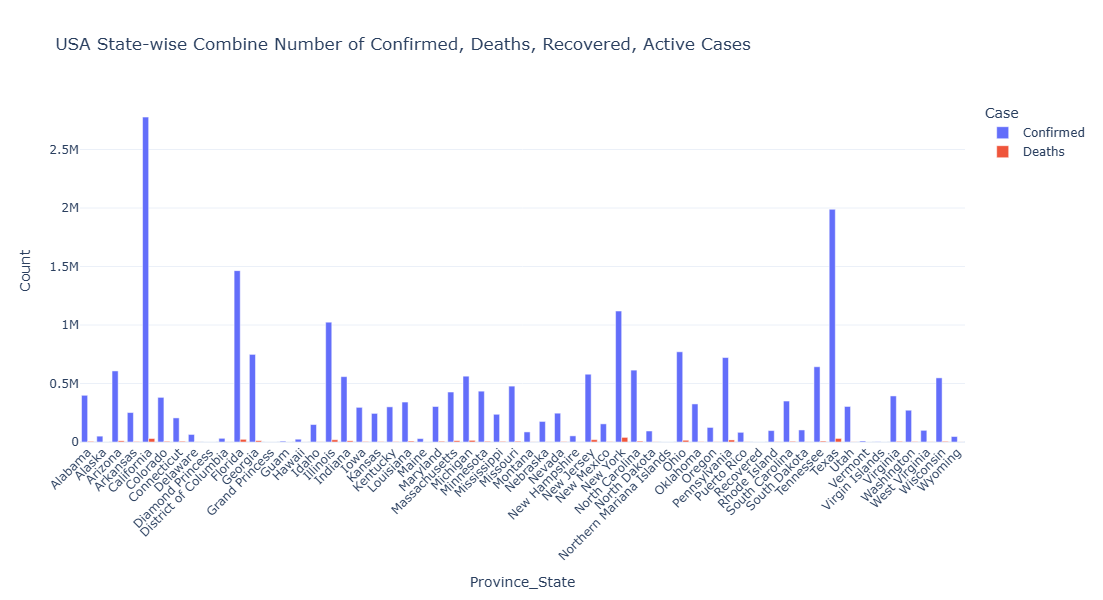

In [166]:
import pandas as pd
import plotly.express as px

covid_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-09-2021.csv')

usa_data = covid_data[covid_data['Country_Region'] == 'US']

state_summary = usa_data.groupby('Province_State')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()

state_summary_melted = state_summary.melt(
    id_vars='Province_State', 
    value_vars=['Confirmed', 'Deaths'], 
    var_name='Case', 
    value_name='Count'
)

fig = px.bar(
    state_summary_melted, 
    x='Province_State', 
    y='Count', 
    color='Case', 
    title='USA State-wise Combine Number of Confirmed, Deaths, Recovered, Active Cases',
    labels={'Province_State': 'State', 'Count': 'Count', 'Case': 'Case Type'},
    height=600
)

fig.update_layout(
    xaxis_title="Province_State",
    yaxis_title="Count",
    xaxis_tickangle=-45,  
    legend_title="Case",
    barmode='group',
    template="plotly_white"  
)

fig.show()


### Question 9

### Plot Worldwide Confirmed Cases over time

In [174]:
import plotly.express as px
import plotly.io as pio

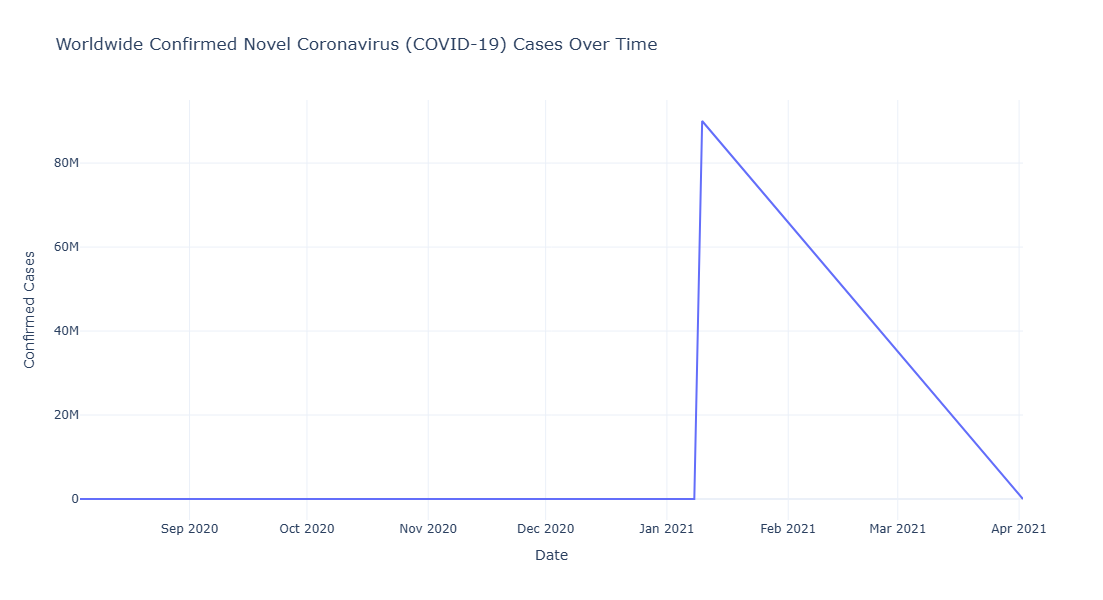

In [176]:
global_confirmed = covid_data.groupby(covid_data['Last_Update'].dt.date)['Confirmed'].sum().reset_index()

# Rename columns for better readability
global_confirmed.columns = ['Date', 'Confirmed']

# Create the line plot using plotly.express
fig = px.line(
    global_confirmed,
    x='Date',
    y='Confirmed',
    title='Worldwide Confirmed Novel Coronavirus (COVID-19) Cases Over Time',
    labels={'Date': 'Date', 'Confirmed': 'Confirmed Cases'},
    height=600
)

# Customize the layout
fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Confirmed Cases",
    template="plotly_white"  # White background template
)

# Display the plot using plotly.io
pio.show(fig)